In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in the files as pandas frames and rename columns as needed. 
G1E_count = pd.read_csv('G1E_features.txt', sep="\s+", header=None)
G1E_count = G1E_count.rename(columns={0:'Count', 1:'Feature'})

ER4_count = pd.read_csv('Er4_features.txt', sep="\s+", header=None)
ER4_count = ER4_count.rename(columns={0:'Count', 1:'Feature'})

Changes = pd.read_csv('loss_gain.txt', sep="\s+", header=None)
Changes = Changes.rename(columns={0:'Count', 1:'Type'})

#Making the cateorgies make sense
Changes['Type'][0] = "Loss"
Changes['Type'][1] = "Gain"

ER4_count

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Count,Feature
0,101,exon
1,341,intron
2,67,promoter


In [3]:
G1E_count

,Count,Feature
0,84,exon
1,307,intron
2,54,promoter


In [4]:
Changes

,Count,Type
0,57,Loss
1,124,Gain


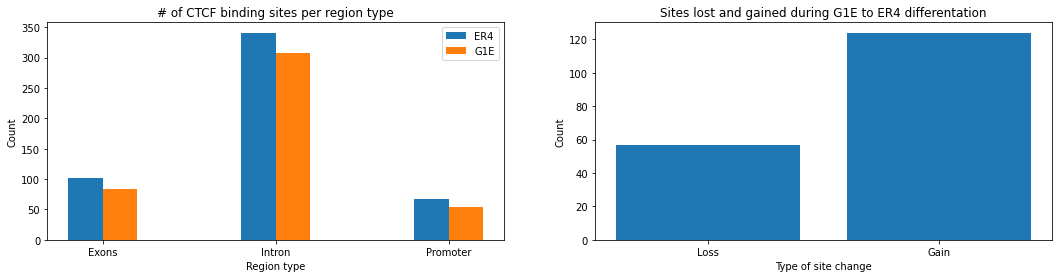

In [5]:

fig = plt.figure(figsize=(18.0, 4.0))

features = fig.add_subplot(1, 2, 1) #plot for feature type
sites = fig.add_subplot(1, 2, 2) #plot for gains and losses in differentation
    
barWidth = 0.4
br1 = np.arange(len(ER4_count["Feature"])) 
br2 = [x + (barWidth/2) for x in br1] #Move over the other bar so they don't overlap

features.bar(br1, ER4_count["Count"], width = barWidth/2, label = "ER4")
features.bar(br2, G1E_count["Count"], width = barWidth/2, label = "G1E")

features.set_ylabel('Count')
features.set_xlabel('Region type')
features.set_title('# of CTCF binding sites per region type')
features.set_xticks([0.1, 1.1, 2.1]) #Center the ticks under the bars
features.set_xticklabels(['Exons', 'Intron', 'Promoter'])

sites.bar(Changes["Type"], Changes["Count"])
sites.set_title('Sites lost and gained during G1E to ER4 differentation')
sites.set_xlabel('Type of site change')
sites.set_ylabel('Count')


features.legend()
plt.show()